Please copy the notebook to your drive and write your code in it.

# New section

Import necessary libraries

In [425]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

Read Dataset from csv file

In [426]:
 iris= pd.read_csv('/content/Iris.csv')

Preview dataset

In [427]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Declare feature vector and target variable

In [428]:
features = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]

In [429]:
iris.shape

(150, 6)

In [430]:
X = iris[features]
y = iris[["Species"]]
iris["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

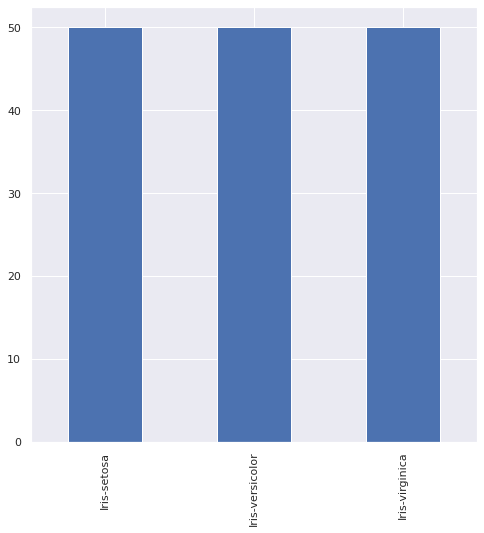

In [431]:
# Plot the distribution of the target variable.
iris['Species'].value_counts().plot.bar()

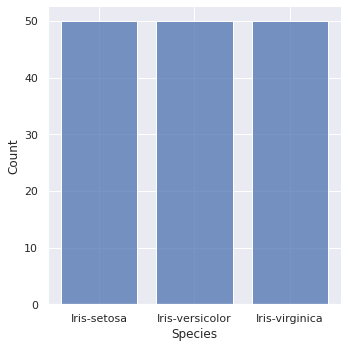

In [432]:
# Plot the distribution of the target variable. (using seaborn)
sns.displot(iris, x="Species", shrink=.8)


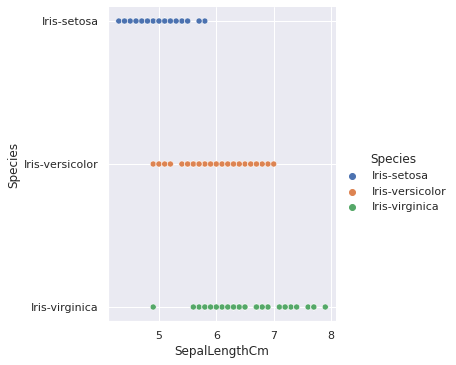

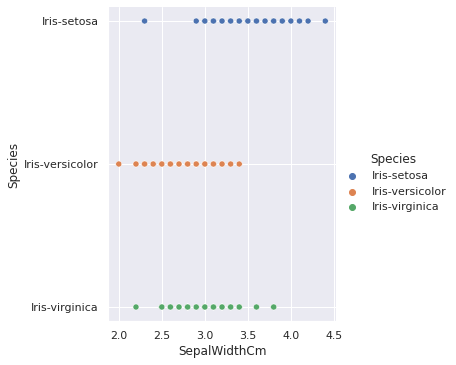

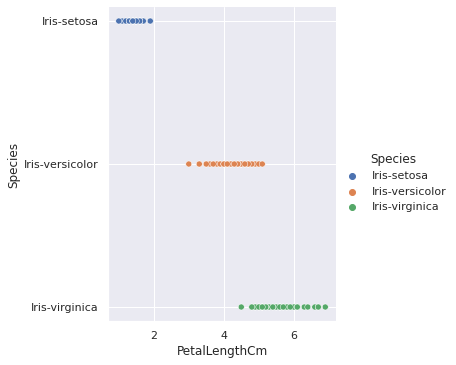

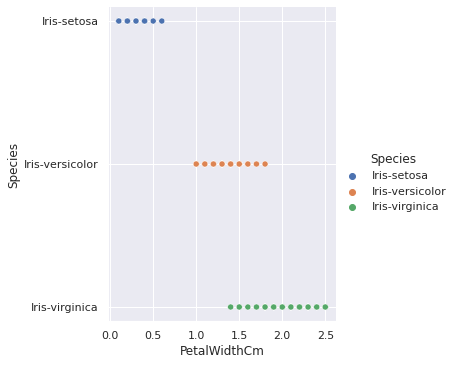

In [433]:
# Visualize the distribution of data for every feature.
# for i in range (0,iris.shape[1]):
sns.relplot(x=features[0], y="Species", hue="Species", data=iris);
sns.relplot(x=features[1], y="Species", hue="Species", data=iris);
sns.relplot(x=features[2], y="Species", hue="Species", data=iris);
sns.relplot(x=features[3], y="Species", hue="Species", data=iris);

Replace categorical data with numbers

In [434]:
le = LabelEncoder()
iris['Species'] = le.fit_transform(iris['Species'])
iris.head(80)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
75,76,6.6,3.0,4.4,1.4,1
76,77,6.8,2.8,4.8,1.4,1
77,78,6.7,3.0,5.0,1.7,1
78,79,6.0,2.9,4.5,1.5,1


Split data into train and test sets

In [435]:
iris = shuffle(iris)
iris.head(80)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
13,14,4.3,3.0,1.1,0.1,0
105,106,7.6,3.0,6.6,2.1,2
74,75,6.4,2.9,4.3,1.3,1
50,51,7.0,3.2,4.7,1.4,1
46,47,5.1,3.8,1.6,0.2,0
...,...,...,...,...,...,...
84,85,5.4,3.0,4.5,1.5,1
59,60,5.2,2.7,3.9,1.4,1
147,148,6.5,3.0,5.2,2.0,2
111,112,6.4,2.7,5.3,1.9,2


In [436]:
# 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)
X_train.shape

(120, 4)

Base estimator(Decision Tree classifier) : a weak learner with max_depth=2

In [437]:
dt_clf = tree.DecisionTreeClassifier(max_depth = 2)

Fit weak classifier

In [438]:
dt_clf = dt_clf.fit(X_train,y_train)

In [439]:
# cross validation
scores = cross_val_score(dt_clf, X, y, cv=5)
scores

array([0.933333, 0.966667, 0.900000, 0.866667, 1.000000])

Calculate the accuracy by the weak learner

In [440]:
score_dt = dt_clf.score(X_test, y_test)
score_dt

0.9666666666666667

Build the AdaBoost model with the the above decision tree and by increasing the number of trees from 1 to 5 with a step of 1 in the lines:

Hint:   
estimators = list(range(1, 5, 1))
for n_est in estimators:



In [441]:
# Ada_scores will give accuracy for 1,2,3 and 4 number of weak learners, 
estimators = list(range(1, 5, 1))
ada_scores = []
for n_est in estimators:
 ada_clf = AdaBoostClassifier(dt_clf, n_estimators=n_est)
 ada_clf.fit(X_train, y_train)
 ada_score = ada_clf.score(X_test, y_test)
 ada_scores.append(ada_score)
ada_scores


[0.9666666666666667,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333]

In [442]:
# Find best parameter using grid search cv
scorer = metrics.make_scorer(metrics.f1_score, average = 'weighted')
parameters = {'n_estimators':[2,3,4]}
grid_search = GridSearchCV(ada_clf, parameters, scoring=scorer, cv=5)
grid_search.fit(X_train, y_train) 
print(grid_search.best_params_)

{'n_estimators': 4}


In [443]:
print(grid_search.best_score_) 

0.9749346405228758


In [444]:
# cross validating for n_estimators = 2
ada_cv_scores = cross_val_score(AdaBoostClassifier(dt_clf, n_estimators=2), X, y, cv=5)
ada_cv_scores 

array([0.933333, 0.966667, 0.900000, 0.966667, 1.000000])

In [445]:
ada_mean_score = ada_cv_scores.mean()
ada_mean_score

0.9533333333333334

Plot the model performance

In [446]:
import matplotlib.pyplot as plt
classifiers = ["Decison tree", "Adaboost"]
accuracies = [score_dt, ada_mean_score]



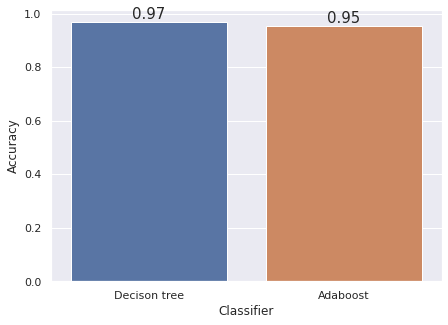

In [447]:
import seaborn as sns
fig_dims = (7, 5)
fig, ax = plt.subplots(figsize=fig_dims)
data = {"Classifier":classifiers ,
        "Accuracy": accuracies}
df = pd.DataFrame(data, columns=['Classifier', 'Accuracy'])
plots = sns.barplot(x="Classifier", y="Accuracy", data=df)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
  

#Bayes Classfication

# New Section

Import modules

In [448]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

Naive Bayes algorithm using 5-fold cross validation 

In [449]:
# for gaussian naive bayes
clf_bayes = GaussianNB()
clf_bayes= clf_bayes.fit(X_train, y_train)
clf_bayes.score(X_test, y_test)

0.9333333333333333

In [450]:
# cross validation on gaussian naive bayes
scores_bayes = cross_val_score(clf_bayes, X, y, cv=5)
scores_bayes

array([0.933333, 0.966667, 0.933333, 0.933333, 1.000000])

Plot the ROC AUC curve

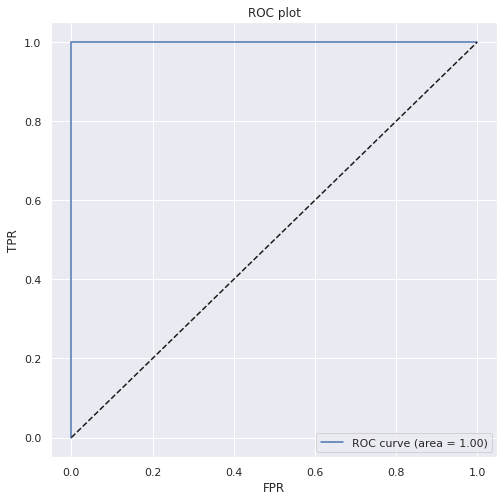

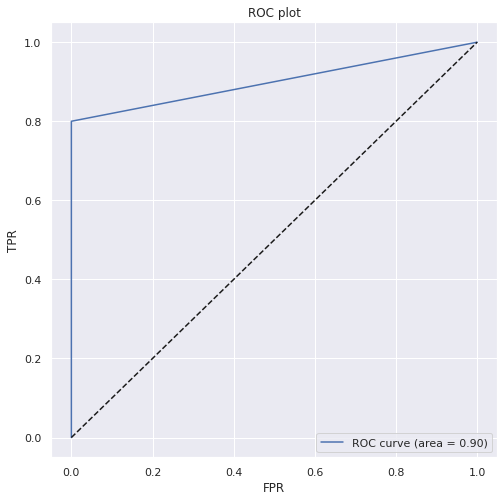

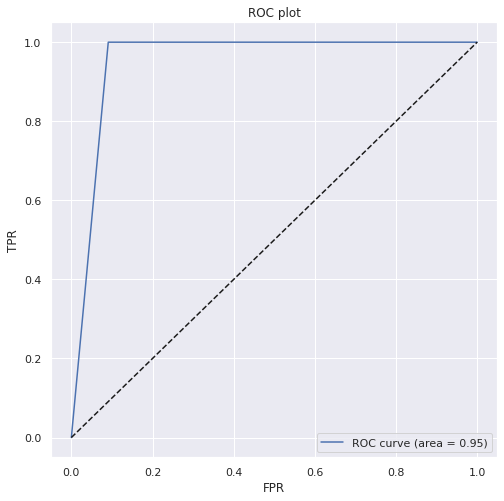

In [451]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt


y = label_binarize(y, classes=[0,1,2])
n_classes = 3


clf = OneVsRestClassifier(clf_bayes)
y_score = clf.fit(X_train, y_train).predict(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(np.array(pd.get_dummies(y_test))[:, i], np.array(pd.get_dummies(y_score))[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC plot')
    plt.legend(loc="lower right")
    plt.show()

Use logarithmic discriminant function to compute accuracy

In [452]:
clf_lda = LinearDiscriminantAnalysis()
clf_lda.fit(X_train, y_train)
clf_lda.score(X_test, y_test)

0.9333333333333333

Bayes risk

In [453]:
# first we will find posterior probablities using gaussian distribution
clf_bayes.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype='<U15')

In [454]:
np.set_printoptions(formatter={'float_kind':'{:f}'.format})
probab = clf_bayes.predict_proba(X_test)
probab

array([[1.000000, 0.000000, 0.000000],
       [0.000000, 0.000001, 0.999999],
       [0.000000, 0.000005, 0.999995],
       [1.000000, 0.000000, 0.000000],
       [1.000000, 0.000000, 0.000000],
       [1.000000, 0.000000, 0.000000],
       [0.000000, 0.000001, 0.999999],
       [0.000000, 0.999897, 0.000103],
       [0.000000, 0.999879, 0.000121],
       [0.000000, 0.000000, 1.000000],
       [1.000000, 0.000000, 0.000000],
       [1.000000, 0.000000, 0.000000],
       [0.000000, 0.999603, 0.000397],
       [0.000000, 0.999453, 0.000547],
       [1.000000, 0.000000, 0.000000],
       [1.000000, 0.000000, 0.000000],
       [0.000000, 0.000000, 1.000000],
       [0.000000, 0.000000, 1.000000],
       [0.000000, 0.999999, 0.000001],
       [1.000000, 0.000000, 0.000000],
       [0.000000, 0.001676, 0.998324],
       [1.000000, 0.000000, 0.000000],
       [0.000000, 0.991494, 0.008506],
       [0.000000, 0.496186, 0.503814],
       [0.000000, 0.103698, 0.896302],
       [0.000000, 0.00000

In [455]:
# cross checking if the probablities sum to 1
probab.sum(axis = 1)

array([1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000,
       1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000,
       1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000,
       1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000,
       1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000])

In [456]:
# to calculate bayes risk 
# risk(action) = 
loss = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
np.transpose(loss)
# multiply with probab 
risk = np.matmul(probab , loss)

In [457]:
risk

array([[1.000000, 2.000000, 3.000000],
       [6.999998, 7.999998, 8.999998],
       [6.999986, 7.999986, 8.999986],
       [1.000000, 2.000000, 3.000000],
       [1.000000, 2.000000, 3.000000],
       [1.000000, 2.000000, 3.000000],
       [6.999997, 7.999997, 8.999997],
       [4.000310, 5.000310, 6.000310],
       [4.000362, 5.000362, 6.000362],
       [6.999999, 7.999999, 8.999999],
       [1.000000, 2.000000, 3.000000],
       [1.000000, 2.000000, 3.000000],
       [4.001190, 5.001190, 6.001190],
       [4.001640, 5.001640, 6.001640],
       [1.000000, 2.000000, 3.000000],
       [1.000000, 2.000000, 3.000000],
       [7.000000, 8.000000, 9.000000],
       [6.999999, 7.999999, 8.999999],
       [4.000004, 5.000004, 6.000004],
       [1.000000, 2.000000, 3.000000],
       [6.994971, 7.994971, 8.994971],
       [1.000000, 2.000000, 3.000000],
       [4.025519, 5.025519, 6.025519],
       [5.511443, 6.511443, 7.511443],
       [6.688905, 7.688905, 8.688905],
       [7.000000, 8.00000

In [499]:
bayes_risk = risk.min(axis=1)

In [500]:
bayes_risk

array([1.000000, 6.999998, 6.999986, 1.000000, 1.000000, 1.000000,
       6.999997, 4.000310, 4.000362, 6.999999, 1.000000, 1.000000,
       4.001190, 4.001640, 1.000000, 1.000000, 7.000000, 6.999999,
       4.000004, 1.000000, 6.994971, 1.000000, 4.025519, 5.511443,
       6.688905, 7.000000, 1.000000, 4.001332, 1.000000, 4.001772])

In [458]:
import matplotlib.pyplot as plt


**Real Life Dataset**

Create the labels from the given data.
Plot the distribution of samples using histogram.
Determine the prior probability for both the classes.
Determine the likelihood / class conditional probabilities for the classes. (Hint : Discretize the car heights into bins, you can use normalized histograms)
Plot the count of each unique element for each class. (Please mention in the report why this plot is different from the distribution)
Calculate the P(C1|x) and P(C2|x) i.e posterior probabilities and plot them in a single graph. [5 marks]


In [459]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
13,14,4.3,3.0,1.1,0.1,0
105,106,7.6,3.0,6.6,2.1,2
74,75,6.4,2.9,4.3,1.3,1
50,51,7.0,3.2,4.7,1.4,1
46,47,5.1,3.8,1.6,0.2,0


In [460]:
iris_vis = iris[['SepalLengthCm', 'Species']]

In [461]:
iris_vis.head()

,SepalLengthCm,Species
13,4.3,0
105,7.6,2
74,6.4,1
50,7.0,1
46,5.1,0


In [462]:
iris_vis.shape

(150, 2)

In [463]:
iris_vis_data = iris_vis.to_numpy()

# Create the labels from the data

In [464]:
x_c1 = []
x_c2 = []
x_c3 = []
for i in range(iris_vis_data.shape[0]):
  if(iris_vis_data[i][1]== 0):
    x_c1.append(iris_vis_data[i][0])
  elif (iris_vis_data[i][1]== 1):
    x_c2.append(iris_vis_data[i][0])
  elif (iris_vis_data[i][1]== 2):
     x_c3.append(iris_vis_data[i][0])

In [465]:
print(x_c1)
print(x_c2)
print(x_c3)

[4.3, 5.1, 4.8, 5.0, 5.1, 4.8, 5.5, 5.2, 4.4, 5.4, 4.9, 5.8, 4.9, 5.7, 5.0, 5.1, 5.1, 5.0, 5.7, 5.2, 5.1, 5.0, 4.7, 5.1, 4.9, 4.4, 4.6, 4.6, 5.5, 4.8, 4.8, 5.0, 5.3, 4.7, 5.0, 4.8, 5.1, 4.6, 5.1, 5.0, 5.4, 5.0, 4.6, 5.2, 5.4, 5.4, 4.5, 4.4, 4.9, 5.4]
[6.4, 7.0, 5.8, 4.9, 5.0, 5.5, 6.6, 6.4, 5.0, 5.7, 5.6, 6.3, 5.6, 6.1, 6.0, 6.2, 5.8, 6.1, 5.5, 5.7, 6.3, 6.6, 6.9, 6.2, 6.3, 6.7, 6.0, 5.9, 5.1, 5.4, 5.2, 5.9, 5.7, 6.0, 6.1, 5.5, 5.8, 5.7, 6.7, 5.7, 6.1, 6.7, 6.5, 6.8, 5.5, 5.6, 5.5, 6.0, 5.6, 5.6]
[7.6, 6.9, 6.4, 6.1, 7.7, 6.7, 7.7, 7.9, 7.7, 6.0, 6.9, 7.4, 6.5, 6.4, 5.6, 6.3, 7.3, 7.2, 6.3, 5.9, 6.5, 4.9, 6.8, 6.5, 6.4, 6.0, 7.2, 6.9, 6.5, 5.8, 6.7, 6.1, 5.8, 6.7, 6.3, 5.8, 6.2, 6.3, 7.2, 6.8, 6.7, 6.4, 6.2, 6.7, 5.7, 7.7, 6.3, 6.3, 6.4, 7.1]


# Plotting the distribution of samples.

In [466]:
import seaborn as sns
sns.set(rc={'figure.figsize':(8,8)})
x = iris_vis_data[:,0]


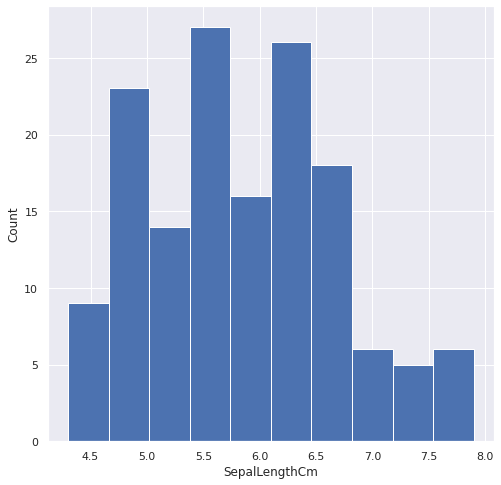

In [467]:
#This gives a clear idea
plt.hist(x)
plt.xlabel("SepalLengthCm")
plt.ylabel("Count")
plt.show()

# Prior Probabilities for both the classes

In [468]:
iris_vis['Species'].unique()

array([0, 2, 1])

In [469]:
 iris_vis['Species'].value_counts()

2    50
1    50
0    50
Name: Species, dtype: int64

In [470]:
prob_c1 = 50/ len(iris_vis_data)
prob_c2 = 50/ len(iris_vis_data)
prob_c3 = 50/ len(iris_vis_data)
print("Prior Class 1:",prob_c1)
print("Prior Class 2:",prob_c2)
print("Prior Class 3:",prob_c3)

Prior Class 1: 0.3333333333333333
Prior Class 2: 0.3333333333333333
Prior Class 3: 0.3333333333333333


# Unique Values

In [471]:
iris_vis['SepalLengthCm'].unique()

array([4.300000, 7.600000, 6.400000, 7.000000, 5.100000, 6.900000,
       4.800000, 5.800000, 5.000000, 4.900000, 5.500000, 6.600000,
       6.100000, 5.200000, 7.700000, 6.700000, 4.400000, 5.700000,
       5.600000, 5.400000, 6.300000, 7.900000, 6.000000, 6.200000,
       7.400000, 6.500000, 7.300000, 7.200000, 5.900000, 6.800000,
       4.700000, 4.600000, 5.300000, 4.500000, 7.100000])

In [472]:
iris_vis['SepalLengthCm'].value_counts()

5.0    10
5.1     9
6.3     9
5.7     8
6.7     8
6.4     7
5.8     7
5.5     7
6.0     6
6.1     6
5.4     6
4.9     6
5.6     6
4.8     5
6.5     5
4.6     4
6.9     4
7.7     4
5.2     4
6.2     4
5.9     3
6.8     3
7.2     3
4.4     3
4.7     2
6.6     2
7.1     1
7.6     1
7.4     1
4.5     1
4.3     1
7.3     1
5.3     1
7.9     1
7.0     1
Name: SepalLengthCm, dtype: int64

In [473]:
from collections import Counter
unique_c1 = Counter(x_c1).keys() 
count_unique_c1 = list(Counter(x_c1).values()) 
unique_c2 = Counter(x_c2).keys() 
count_unique_c2 = list(Counter(x_c2).values()) 
unique_c3 = Counter(x_c3).keys() 
count_unique_c3 = list(Counter(x_c3).values()) 


In [474]:
unique_c1

dict_keys([4.3, 5.1, 4.8, 5.0, 5.5, 5.2, 4.4, 5.4, 4.9, 5.8, 5.7, 4.7, 4.6, 5.3, 4.5])

In [475]:
count_unique_c1

[1, 8, 5, 8, 2, 3, 3, 5, 4, 1, 2, 2, 4, 1, 1]

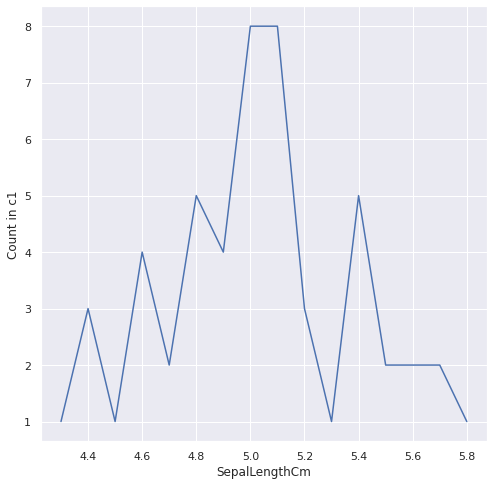

In [476]:
sns.lineplot(list(unique_c1),count_unique_c1)
plt.xlabel("SepalLengthCm")
plt.ylabel("Count in c1")
plt.show()
# from graph it is clear that maximum count in c_1 for one of the sepal lengths is 8 

In [477]:
unique_c2

dict_keys([6.4, 7.0, 5.8, 4.9, 5.0, 5.5, 6.6, 5.7, 5.6, 6.3, 6.1, 6.0, 6.2, 6.9, 6.7, 5.9, 5.1, 5.4, 5.2, 6.5, 6.8])

In [478]:
count_unique_c2

[2, 1, 3, 1, 2, 5, 2, 5, 5, 3, 4, 4, 2, 1, 3, 2, 1, 1, 1, 1, 1]

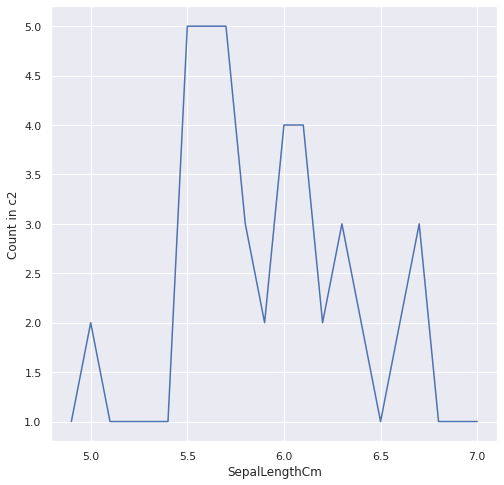

In [479]:
sns.lineplot(list(unique_c2),count_unique_c2)
plt.xlabel("SepalLengthCm")
plt.ylabel("Count in c2")
plt.show()
# from graph

In [480]:
unique_c3

dict_keys([7.6, 6.9, 6.4, 6.1, 7.7, 6.7, 7.9, 6.0, 7.4, 6.5, 5.6, 6.3, 7.3, 7.2, 5.9, 4.9, 6.8, 5.8, 6.2, 5.7, 7.1])

In [481]:
count_unique_c3

[1, 3, 5, 2, 4, 5, 1, 2, 1, 4, 1, 6, 1, 3, 1, 1, 2, 3, 2, 1, 1]

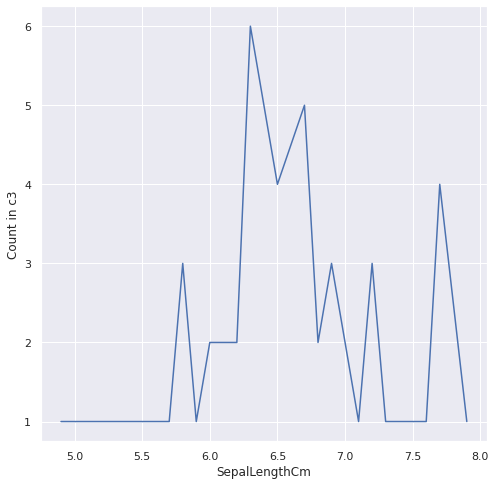

In [482]:
sns.lineplot(list(unique_c3),count_unique_c3)
plt.xlabel("SepalLengthCm")
plt.ylabel("Count in c3")
plt.show()

# Likelihood

In [483]:
y1 = np.array(count_unique_c1)/len(x_c1)
y2 = np.array(count_unique_c2)/len(x_c2)
y3 = np.array(count_unique_c3)/len(x_c3)

In [484]:
y1

array([0.020000, 0.160000, 0.100000, 0.160000, 0.040000, 0.060000,
       0.060000, 0.100000, 0.080000, 0.020000, 0.040000, 0.040000,
       0.080000, 0.020000, 0.020000])

In [485]:
y2

array([0.040000, 0.020000, 0.060000, 0.020000, 0.040000, 0.100000,
       0.040000, 0.100000, 0.100000, 0.060000, 0.080000, 0.080000,
       0.040000, 0.020000, 0.060000, 0.040000, 0.020000, 0.020000,
       0.020000, 0.020000, 0.020000])

In [486]:
y3

array([0.020000, 0.060000, 0.100000, 0.040000, 0.080000, 0.100000,
       0.020000, 0.040000, 0.020000, 0.080000, 0.020000, 0.120000,
       0.020000, 0.060000, 0.020000, 0.020000, 0.040000, 0.060000,
       0.040000, 0.020000, 0.020000])

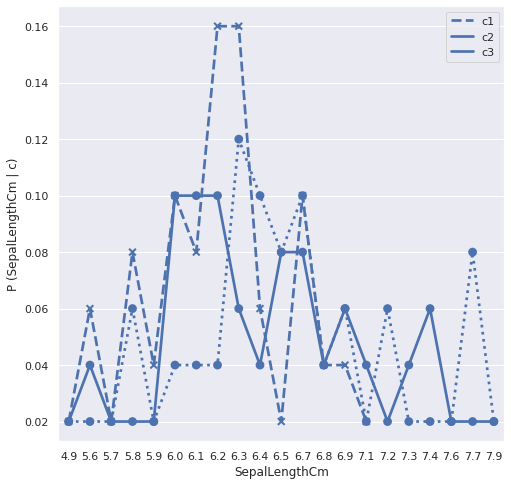

In [487]:
sns.pointplot(list(unique_c1),y1, linestyles="--",markers =['x'] )
sns.pointplot(list(unique_c2),y2,linestyles='-',markers=['o'])
sns.pointplot(list(unique_c3),y3,linestyles=':',markers=['o'])
plt.legend(labels = ['c1','c2','c3'])
plt.xlabel("SepalLengthCm")
plt.ylabel("P (SepalLengthCm | c)")
plt.show()

In [488]:
likelihood_c1 = y1
likelihood_c2 = y2
likelihood_c3 = y3

In [489]:
unique_heights = iris_vis['SepalLengthCm'].unique()
counts = iris_vis['SepalLengthCm'].value_counts()


In [490]:
print(unique_heights)
print(counts)

[4.300000 7.600000 6.400000 7.000000 5.100000 6.900000 4.800000 5.800000
 5.000000 4.900000 5.500000 6.600000 6.100000 5.200000 7.700000 6.700000
 4.400000 5.700000 5.600000 5.400000 6.300000 7.900000 6.000000 6.200000
 7.400000 6.500000 7.300000 7.200000 5.900000 6.800000 4.700000 4.600000
 5.300000 4.500000 7.100000]
5.0    10
5.1     9
6.3     9
5.7     8
6.7     8
6.4     7
5.8     7
5.5     7
6.0     6
6.1     6
5.4     6
4.9     6
5.6     6
4.8     5
6.5     5
4.6     4
6.9     4
7.7     4
5.2     4
6.2     4
5.9     3
6.8     3
7.2     3
4.4     3
4.7     2
6.6     2
7.1     1
7.6     1
7.4     1
4.5     1
4.3     1
7.3     1
5.3     1
7.9     1
7.0     1
Name: SepalLengthCm, dtype: int64


In [491]:
posterior_c1 = []
i=0
for height in unique_c1:
  posterior_c1.append((likelihood_c1[i]* prob_c1)/ ( counts[height] /iris_vis.shape[0]))
  i= i+1

# for better understanding
dict_posterior_c1 = {}
i = 0
for height in unique_c1:
  dict_posterior_c1[height] = posterior_c1[i]
  i +=1



In [492]:
dict_posterior_c1

{4.3: 0.9999999999999999,
 4.4: 0.9999999999999998,
 4.5: 0.9999999999999999,
 4.6: 0.9999999999999999,
 4.7: 0.9999999999999999,
 4.8: 1.0,
 4.9: 0.6666666666666666,
 5.0: 0.7999999999999999,
 5.1: 0.8888888888888888,
 5.2: 0.7499999999999999,
 5.3: 0.9999999999999999,
 5.4: 0.8333333333333333,
 5.5: 0.2857142857142857,
 5.7: 0.24999999999999997,
 5.8: 0.14285714285714285}

In [493]:
posterior_c2 = []
i=0
for height in unique_c2:
  posterior_c2.append((likelihood_c2[i]* prob_c2)/ ( counts[height] /iris_vis.shape[0]))
  i= i+1

# for better understanding
dict_posterior_c2 = {}
i = 0
for height in unique_c2:
  dict_posterior_c2[height] = posterior_c2[i]
  i +=1



In [494]:
dict_posterior_c2

{4.9: 0.16666666666666666,
 5.0: 0.19999999999999998,
 5.1: 0.1111111111111111,
 5.2: 0.24999999999999997,
 5.4: 0.16666666666666666,
 5.5: 0.7142857142857142,
 5.6: 0.8333333333333333,
 5.7: 0.625,
 5.8: 0.4285714285714285,
 5.9: 0.6666666666666666,
 6.0: 0.6666666666666666,
 6.1: 0.6666666666666666,
 6.2: 0.49999999999999994,
 6.3: 0.3333333333333333,
 6.4: 0.2857142857142857,
 6.5: 0.19999999999999998,
 6.6: 0.9999999999999999,
 6.7: 0.37499999999999994,
 6.8: 0.3333333333333333,
 6.9: 0.24999999999999997,
 7.0: 0.9999999999999999}

In [495]:
posterior_c3 = []
i=0
for height in unique_c3:
  posterior_c3.append((likelihood_c3[i]* prob_c3)/ ( counts[height] /iris_vis.shape[0]))
  i= i+1

# for better understanding
dict_posterior_c3 = {}
i = 0
for height in unique_c3:
  dict_posterior_c3[height] = posterior_c3[i]
  i +=1


In [496]:
dict_posterior_c3

{4.9: 0.16666666666666666,
 5.6: 0.16666666666666666,
 5.7: 0.12499999999999999,
 5.8: 0.4285714285714285,
 5.9: 0.3333333333333333,
 6.0: 0.3333333333333333,
 6.1: 0.3333333333333333,
 6.2: 0.49999999999999994,
 6.3: 0.6666666666666666,
 6.4: 0.7142857142857142,
 6.5: 0.7999999999999999,
 6.7: 0.625,
 6.8: 0.6666666666666666,
 6.9: 0.7499999999999999,
 7.1: 0.9999999999999999,
 7.2: 0.9999999999999998,
 7.3: 0.9999999999999999,
 7.4: 0.9999999999999999,
 7.6: 0.9999999999999999,
 7.7: 0.9999999999999999,
 7.9: 0.9999999999999999}

Text(0, 0.5, 'P(c |SepalLengthCm ')

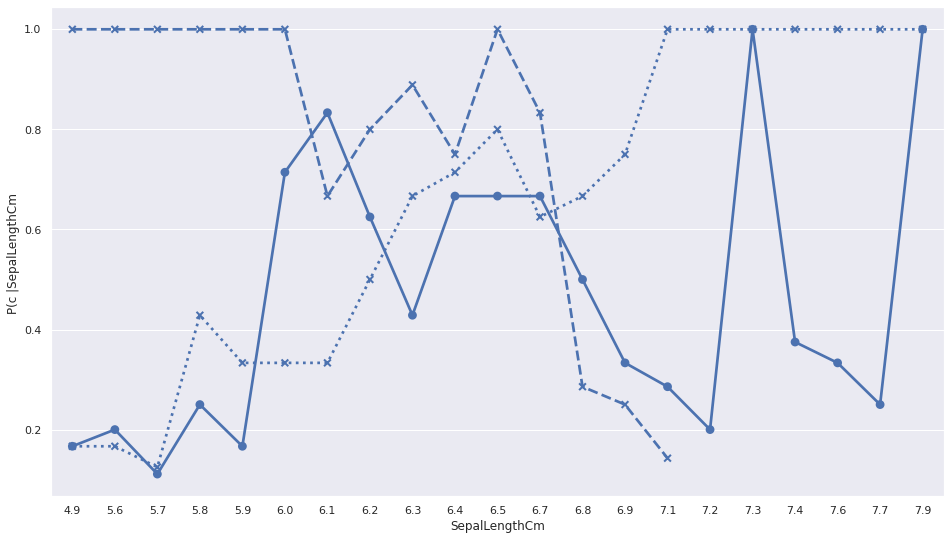

In [497]:
fig_dims = (16, 9)
fig, ax = plt.subplots(figsize=fig_dims)
sns.pointplot(list(unique_c1),posterior_c1, linestyles="--",markers =['x'] )
sns.pointplot(list(unique_c2),posterior_c2,linestyles='-',markers=['o'])
sns.pointplot(list(unique_c3),posterior_c3, linestyles=":",markers =['x'] )
plt.xlabel("SepalLengthCm")
plt.ylabel("P(c |SepalLengthCm ")


[Decision Tree](https://https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

[Adaboost Explaination](https://https://towardsdatascience.com/understanding-adaboost-2f94f22d5bfe)

[Adaboost](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html)

[Naive Bayes](https://https://scikit-learn.org/stable/modules/naive_bayes.html)


[Bayes Risk](https://drive.google.com/file/d/14oDBVaOWt6y5kSceIPLK59v3iNu9PjWb/view)

[Discriminant function](https://drive.google.com/file/d/1ggLEGpgcwEen1lec5VW1Gqjp9nQI0-rM/view)

[Discriminant function analysis](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html)




